<a href="https://colab.research.google.com/github/Avneet-0001/Youtube_Spam_Comments_Detector/blob/main/Youtube_Comments_Spam_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Youtube Comments Spam Detector

In this project, I implement supervised classification machine learning models to identify if a youtube comment is a spam or a ham. Identifying and potentially blocking spam comments on youtube videos is important to avoid data breach, cybersecurity issues, and to improve user experience. Correctly predicting if a comment is ham is important too to avoid legitimate comments from being blocked. The goal for this project is to accurately identify both spam and ham.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import imblearn
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, recall_score

In [2]:
# Import the data from github using git command
!git clone https://github.com/Avneet-0001/Youtube_Comments_Spam_Predictor.git
# Browsing the directory
!ls

Cloning into 'Youtube_Comments_Spam_Predictor'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (14/14), 163.68 KiB | 13.64 MiB/s, done.
Resolving deltas: 100% (1/1), done.
sample_data  Youtube_Comments_Spam_Predictor


In [3]:
data_files = ['Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube01-Psy.csv','Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube02-KatyPerry.csv','Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube03-LMFAO.csv','Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube04-Eminem.csv','Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube05-Shakira.csv']

data = []

for file in data_files:
    new_data = pd.read_csv(file)
    data.append(new_data)
data = pd.concat(data)
data.head()

#data = pd.read_csv("Youtube_Comments_Spam_Predictor/Youtube dataset/Youtube04-Eminem.csv")
#data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [4]:
data['new_date'] = pd.to_datetime(data['DATE'], format='mixed')
data['date_only'] = data['new_date'].dt.date

In [5]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,new_date,date_only
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,2013-11-07 06:20:48,2013-11-07
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,2013-11-07 12:37:15,2013-11-07
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,2013-11-08 17:34:21,2013-11-08
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,2013-11-09 08:28:43,2013-11-09
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,2013-11-10 16:05:38,2013-11-10


In [6]:
data_sorted = data.sort_values(by='date_only')
data_sorted.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,new_date,date_only
369,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0,2013-07-12 22:33:27.916,2013-07-12
359,_2viQ_Qnc6_fgKR1W7-k1lbVURi8hVbMlQAMSOCSnyk,ThirdDegr3e,2013-07-13T20:48:22.967000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1,2013-07-13 20:48:22.967,2013-07-13
360,_2viQ_Qnc69MEEHHJxZ427KX8MlljJPnUC2YBbvbWwY,ThirdDegr3e,2013-07-13T20:48:06.033000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1,2013-07-13 20:48:06.033,2013-07-13
361,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1,2013-07-13 20:47:40.793,2013-07-13
362,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0,2013-07-13 20:17:25.181,2013-07-13


## Data Exploration

In [7]:
print(data_sorted.shape)       #Displaying shape of dataframe

(1956, 7)


In [8]:
#check the count of each class
data_sorted['CLASS'].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

## Data Preparation

In [9]:
#process content

#- Remove all charaters except alphabets a-z & A-Z
#- Convert everything to lower keys
#- Split each comment row into list of words

def process_content(content):
    return " ".join(re.findall("[A-Za-z]+",content.lower()))

data_sorted['processed_content'] = data_sorted['CONTENT'].apply(process_content)
#data_updated.head()

In [10]:
#Below, kept features that are important to train model and for prediction
#Removed 3 features(columns): COMMENT_ID, AUTHOR, DATE
#These 3 columns will not be helpful for training and prediction
to_keep = ['processed_content','CLASS']
data_updated = data_sorted[to_keep]
data_updated.info()
data_updated.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1956 entries, 369 to 445
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   processed_content  1956 non-null   object
 1   CLASS              1956 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.4+ KB


,processed_content,CLASS
369,shakira is the best dancer,0
359,check out my new mixtape check out my new mixt...,1
360,check out my new mixtape check out my new mixt...,1
361,check out my new mixtape check out my new mixt...,1
362,waka waka she rules,0


In [11]:
#Train test split
split_index = int(0.7 * len(data_updated))

# Split the data
train_df = data_updated.iloc[:split_index]
test_df = data_updated.iloc[split_index:]

x_train = train_df['processed_content']
y_train = train_df['CLASS']
x_test = test_df['processed_content']
y_test = test_df['CLASS']
#x_train, x_test, y_train, y_test = train_test_split(data_updated['processed_content'],data_updated['CLASS'],test_size=0.2,random_state=57)

In [17]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN + FP)
    return specificity

def calculate_metrics(y_train_pred, y_pred):
    cm_train = confusion_matrix(y_train,y_train_pred)
    cm_test = confusion_matrix(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_pred)
    specificity_train = specificity_score(y_train, y_train_pred)
    specificity_test = specificity_score(y_test, y_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_pred)
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_pred)

    fpr0, tpr0, thresholds0 = roc_curve(y_train, y_train_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    print('Training data Confusion Matrix=', cm_train)
    print('Test Confusion Matrix=', cm_test)
    print('Accuracy for training=', accuracy_train)
    print('Accuracy for test=', accuracy_test)
    print('Precision for training=', precision_train)
    print('Precision for test=', precision_test)
    print('Recall for training=', recall_train)
    print('Recall for test=', recall_test)
    print('Specificity for training=', specificity_train)
    print('Specificity for test=', specificity_test)
    print('F1 score for training=', f1_train)
    print('F1 score for test=', f1_test)
    print('AUC in Training:', auc_train)
    print('AUC in Test:', auc_test)

    plt.figure(figsize=(8, 6))

    # ROC for Training
    plt.plot(fpr0, tpr0, color='#2178b5', linestyle='-', label='Training AUC = %0.2f' % auc_train)

    # ROC for Test
    plt.plot(fpr, tpr, color='#ff8f2c', linestyle='-', label='Testing AUC = %0.2f)' % auc_test)

    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    return

# Feature extraction

In [13]:
# Count Vectorizer converts a collection of text documents into a matrix of token counts. It essentially represents each document by the
# frequency of words occurring in it, ignoring stop words if specified.

count_vect = CountVectorizer(stop_words='english')
x_train_counts = count_vect.fit_transform(x_train)
print(count_vect.vocabulary_)
print(x_train_counts)

# TF-IDF (Term Frequency-Inverse Document Frequency): This is a statistical measure used to evaluate the importance of a word in a document relative
# to a collection of documents (corpus).

# Term Frequency (TF): The frequency of a word in a document = number of times a term appears in a document/total number of terms in the document.
# Inverse Document Frequency (IDF): A measure of whether the word is common or rare across all documents = log (number of documents in the corpus / number of documents containing the word).

# The combination of these two measures helps in transforming the count matrix into a normalized TF-IDF representation, which reduces the impact of
# frequently occurring words that are less informative and highlights the more significant words.

#Term frequency - inverse document frequency

tranformer = TfidfTransformer()
x_train_tfidf = tranformer.fit_transform(x_train_counts)
print(x_train_tfidf)

{'shakira': 2423, 'best': 245, 'dancer': 635, 'check': 441, 'new': 1883, 'mixtape': 1798, 'waka': 2979, 'rules': 2353, 'wiredo': 3048, 'wow': 3079, 'sooooo': 2531, 'beautiful': 226, 'love': 1661, 'song': 2524, 'sing': 2471, 'camp': 386, 'time': 2769, 'reasons': 2255, 'africa': 65, 'born': 312, 'south': 2544, 'hey': 1259, 'music': 1847, 'fans': 928, 'really': 2252, 'appreciate': 145, 'read': 2245, 'just': 1475, 'year': 3118, 'old': 1964, 'boy': 319, 'dreaming': 754, 'successful': 2643, 'musician': 1848, 'world': 3071, 'lots': 1659, 'covers': 577, 'piano': 2072, 'dont': 739, 'money': 1809, 'advertise': 52, 'simple': 2467, 'thumbs': 2762, 'comment': 515, 'videos': 2928, 'subscription': 2638, 'step': 2596, 'forward': 1018, 'seconds': 2393, 'life': 1598, 'won': 3058, 'regret': 2274, 'thank': 2738, 'people': 2049, 'chance': 428, 'means': 1733, 'lot': 1658, 'omg': 1970, 'facebook': 915, 'gt': 1179, 'swagfriends': 2682, 'com': 505, 'make': 1696, 'thousands': 2758, 'cool': 559, 'friends': 1041,

In [14]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = tranformer.transform(x_test_counts)

# Model development

## Logistic Regression

In [18]:
# Determine the best lambda value

# Cs is inverse of lambda
# log_10(lambda) value from [-5,-4,...,5]

clf = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(5, -6, -1))), cv=5, penalty='l2', scoring='roc_auc',
                           solver='newton-cg', max_iter=30000, random_state=0).fit(x_train_tfidf, y_train)

print('lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=\n',clf.scores_[1].mean(axis=0)) # score for the positive class, takes mean across all folds and gives a value for each lamda. Should have length equal to number of lambda values.
print('The max auc_roc:', clf.scores_[1].mean(axis=0).max())

i = np.where(clf.scores_[1].mean(axis=0)==clf.scores_[1].mean(axis=0).max())
i = int(i[0])
Cs = list(np.power(10.0, np.arange(5, -6, -1)))
Cs_select = Cs[i]
print('The max auc_roc when lambda=',1/Cs[i])

lambda=1/Cs, so the auc_roc score for log_10(lambda) value from [-5,-4,...,5]=
 [0.95560219 0.96089373 0.96679758 0.9709671  0.97320486 0.96804337
 0.95289243 0.93375509 0.92883156 0.92812515 0.92803953]
The max auc_roc: 0.9732048594709495
The max auc_roc when lambda= 0.1


<ipython-input-18-3911a7dff805>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  i = int(i[0])


Training data Confusion Matrix= [[636   4]
 [  2 727]]
Test Confusion Matrix= [[305   6]
 [ 23 253]]
Accuracy for training= 0.9956172388604821
Accuracy for test= 0.9505962521294719
Precision for training= 0.9945280437756497
Precision for test= 0.9768339768339769
Recall for training= 0.9972565157750343
Recall for test= 0.9166666666666666
Specificity for training= 0.99375
Specificity for test= 0.9807073954983923
F1 score for training= 0.9958904109589041
F1 score for test= 0.9457943925233645
AUC in Training: 0.9955032578875173
AUC in Test: 0.9486870310825294


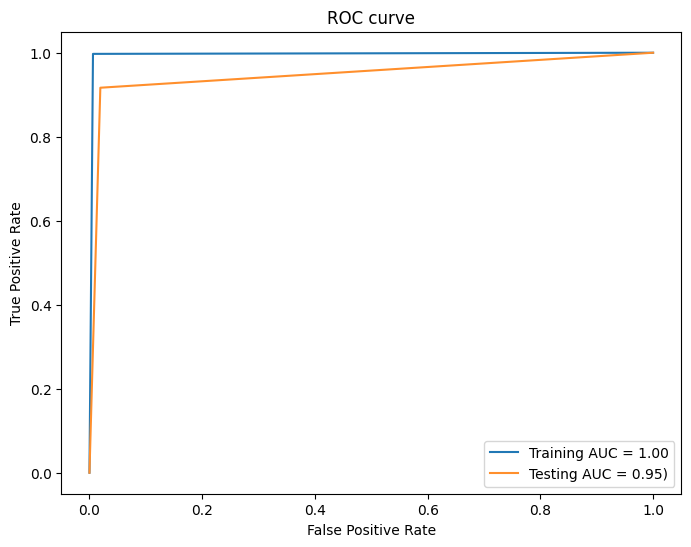

In [19]:
clf = LogisticRegression(random_state=0, C=Cs_select, penalty='l2', max_iter=30000).fit(x_train_tfidf, y_train)
y_train_pred = clf.predict(x_train_tfidf)
y_pred = clf.predict(x_test_tfidf)
calculate_metrics(y_train_pred, y_pred)

## Naive Bayes

Training data Confusion Matrix= [[640   0]
 [161 568]]
Test Confusion Matrix= [[267  44]
 [103 173]]
Accuracy for training= 0.8823959094229364
Accuracy for test= 0.7495741056218058
Precision for training= 1.0
Precision for test= 0.7972350230414746
Recall for training= 0.7791495198902606
Recall for test= 0.6268115942028986
Specificity for training= 1.0
Specificity for test= 0.8585209003215434
F1 score for training= 0.8758673862760217
F1 score for test= 0.7018255578093306
AUC in Training: 0.8895747599451302
AUC in Test: 0.742666247262221


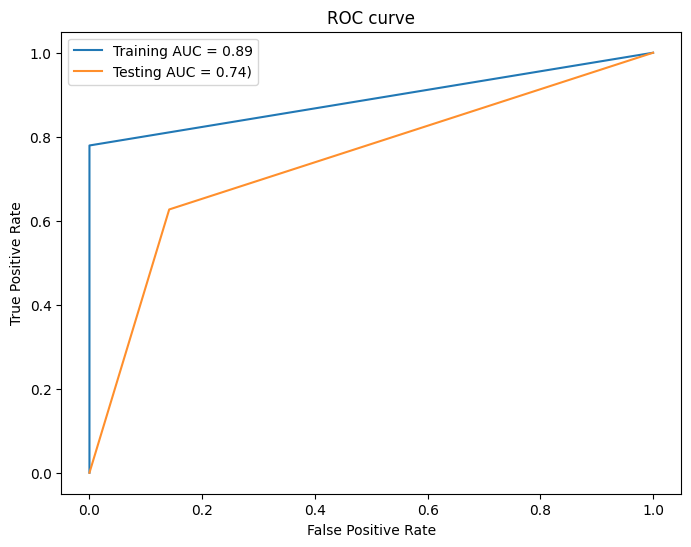

In [20]:
x_train_dense = x_train_tfidf.toarray()
x_test_dense = x_test_tfidf.toarray()

clf = GaussianNB().fit(x_train_dense, y_train)
y_pred = clf.predict(x_test_dense)
y_train_pred = clf.predict(x_train_dense)
calculate_metrics(y_train_pred, y_pred)

## kNN

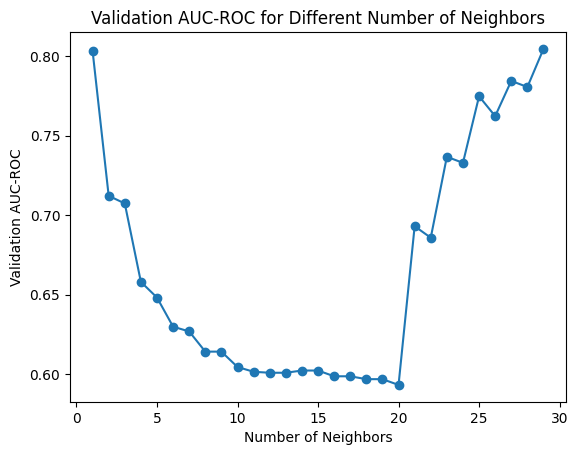

Optimal number of neighbors: 29


In [21]:
# Find the optimal number of neighbors
neighbor_range = range(1, 30)
auc_roc_scores = []

for n_neighbors in neighbor_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train_tfidf, y_train)
    y_val_pred = knn.predict(x_test_tfidf)
    auc_roc = roc_auc_score(y_test, y_val_pred)
    auc_roc_scores.append(auc_roc)

# Plot AUC-ROC scores for different number of neighbors
plt.figure()
plt.plot(neighbor_range, auc_roc_scores, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Validation AUC-ROC')
plt.title('Validation AUC-ROC for Different Number of Neighbors')
plt.show()

# Select the optimal number of neighbors
optimal_n_neighbors = neighbor_range[auc_roc_scores.index(max(auc_roc_scores))]
print('Optimal number of neighbors:', optimal_n_neighbors)


Training data Confusion Matrix= [[592  48]
 [189 540]]
Test Confusion Matrix= [[301  10]
 [ 99 177]]
Accuracy for training= 0.8268809349890431
Accuracy for test= 0.8143100511073254
Precision for training= 0.9183673469387755
Precision for test= 0.946524064171123
Recall for training= 0.7407407407407407
Recall for test= 0.6413043478260869
Specificity for training= 0.925
Specificity for test= 0.9678456591639871
F1 score for training= 0.8200455580865603
F1 score for test= 0.7645788336933046
AUC in Training: 0.8328703703703704
AUC in Test: 0.8045750034950371


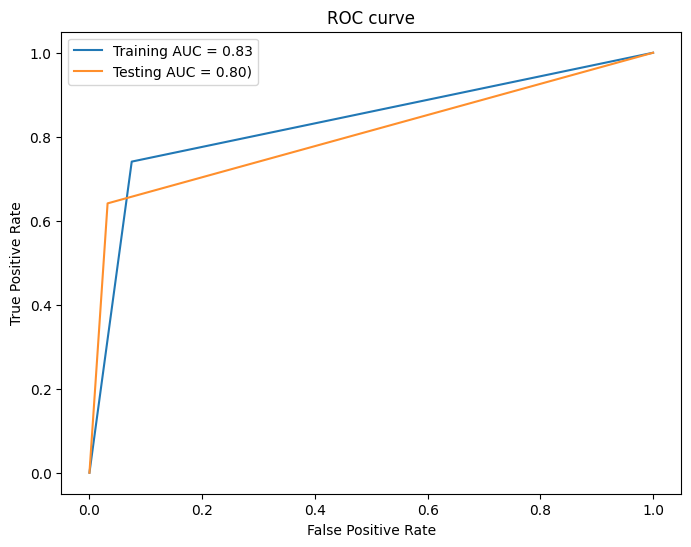

In [22]:
# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=29)  # Adjust n_neighbors as needed

# Train the classifier
knn.fit(x_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = knn.predict(x_train_tfidf)

# Make predictions on the test data
y_test_pred = knn.predict(x_test_tfidf)

calculate_metrics(y_train_pred, y_test_pred)

## Random forest

Best n_estimators: 180
Best max_depth: None
Training data Confusion Matrix= [[640   0]
 [  2 727]]
Test Confusion Matrix= [[306   5]
 [ 21 255]]
Accuracy for training= 0.9985390796201608
Accuracy for test= 0.9557069846678024
Precision for training= 1.0
Precision for test= 0.9807692307692307
Recall for training= 0.9972565157750343
Recall for test= 0.9239130434782609
Specificity for training= 1.0
Specificity for test= 0.9839228295819936
F1 score for training= 0.9986263736263735
F1 score for test= 0.9514925373134328
AUC in Training: 0.9986282578875172
AUC in Test: 0.9539179365301271


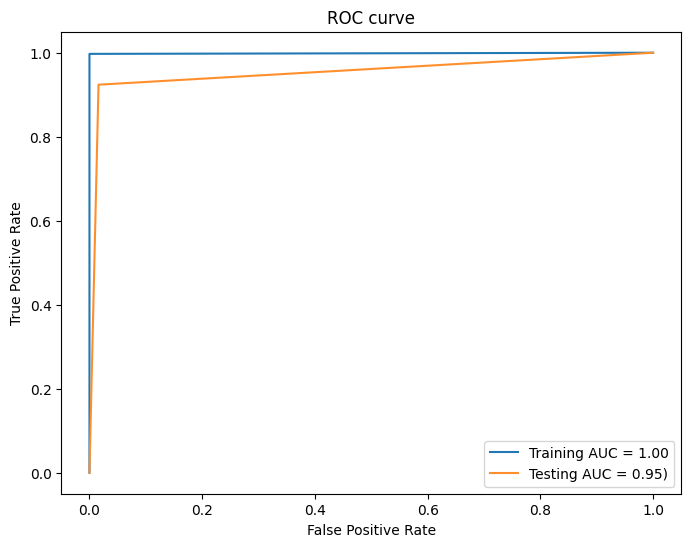

In [23]:
# Parameter grid for grid search
param_grid = {
    'n_estimators': [20, 50, 75, 100, 150, 175, 180, 190, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50, 60]
}

# Instantiate the Random Forest Classifier
random_forest = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(random_forest, param_grid, cv=5)  # Adjust cv (number of cross-validation folds)
grid_search.fit(x_train_tfidf, y_train)

# Get the best hyperparameters
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

# Instantiate the Random Forest Classifier with the best hyperparameters
random_forest_best = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth)

# Train the classifier
random_forest_best.fit(x_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = random_forest_best.predict(x_train_tfidf)

# Make predictions on the test data
y_test_pred = random_forest_best.predict(x_test_tfidf)

calculate_metrics(y_train_pred, y_test_pred)

## MLP Classifier

Training data Confusion Matrix= [[640   0]
 [  2 727]]
Test Confusion Matrix= [[292  19]
 [ 29 247]]
Accuracy for training= 0.9985390796201608
Accuracy for test= 0.9182282793867121
Precision for training= 1.0
Precision for test= 0.9285714285714286
Recall for training= 0.9972565157750343
Recall for test= 0.894927536231884
Specificity for training= 1.0
Specificity for test= 0.9389067524115756
F1 score for training= 0.9986263736263735
F1 score for test= 0.9114391143911439
AUC in Training: 0.9986282578875172
AUC in Test: 0.9169171443217298


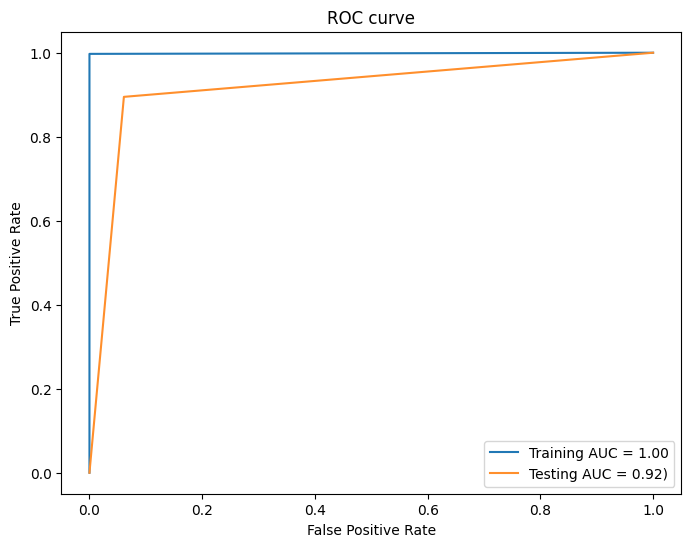

In [24]:
# Instantiate the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(220, 30), max_iter=100)

# Train the classifier
mlp.fit(x_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = mlp.predict(x_train_tfidf)

# Make predictions on the test data
y_test_pred = mlp.predict(x_test_tfidf)

calculate_metrics(y_train_pred, y_test_pred)

## SVC

Best C: 10
Best gamma: 0.1
Training data Confusion Matrix= [[635   5]
 [  2 727]]
Test Confusion Matrix= [[301  10]
 [ 21 255]]
Accuracy for training= 0.9948867786705624
Accuracy for test= 0.9471890971039182
Precision for training= 0.9931693989071039
Precision for test= 0.9622641509433962
Recall for training= 0.9972565157750343
Recall for test= 0.9239130434782609
Specificity for training= 0.9921875
Specificity for test= 0.9678456591639871
F1 score for training= 0.9952087611225188
F1 score for test= 0.9426987060998152
AUC in Training: 0.9947220078875172
AUC in Test: 0.945879351321124


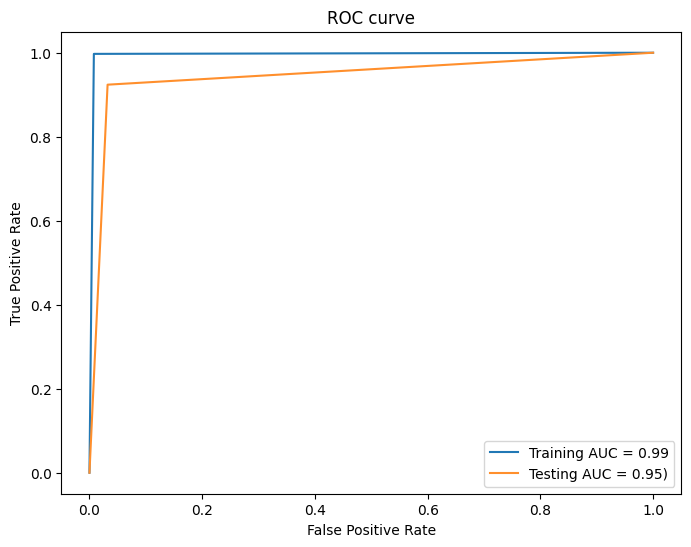

In [25]:
# Parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],  # Adjust C values as needed
    'gamma': [0.1, 1, 10]  # Adjust gamma values as needed
}

# Instantiate the SVM classifier
svm = SVC()  # adjust hyperparameters later

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm, param_grid, cv=5)  # Adjust cv (number of cross-validation folds)
grid_search.fit(x_train_tfidf, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

print("Best C:", best_C)
print("Best gamma:", best_gamma)

# Instantiate the SVC classifier with the best hyperparameters
svm_best = SVC(C=best_C, gamma=best_gamma)

# Train the classifier
svm_best.fit(x_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = svm_best.predict(x_train_tfidf)

# Make predictions on the test data
y_test_pred = svm_best.predict(x_test_tfidf)

calculate_metrics(y_train_pred, y_test_pred)

## Voting Classifier

Training data Confusion Matrix= [[640   0]
 [  2 727]]
Test Confusion Matrix= [[308   3]
 [ 39 237]]
Accuracy for training= 0.9985390796201608
Accuracy for test= 0.9284497444633731
Precision for training= 1.0
Precision for test= 0.9875
Recall for training= 0.9972565157750343
Recall for test= 0.8586956521739131
Specificity for training= 1.0
Specificity for test= 0.9903536977491961
F1 score for training= 0.9986263736263735
F1 score for test= 0.9186046511627908
AUC in Training: 0.9986282578875172
AUC in Test: 0.9245246749615547


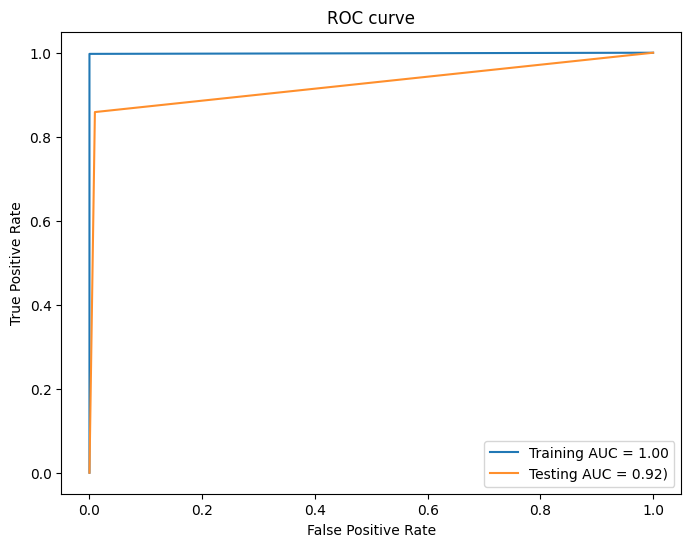

In [26]:
# Define individual classifiers
knn_classifier = KNeighborsClassifier()
mlp_classifier = MLPClassifier()
svc_classifier = SVC(probability=True)
random_forest = RandomForestClassifier()

# Create a Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('knn', knn_classifier),
        ('mlp', mlp_classifier),
        ('svc', svc_classifier),
        ('random_forest', random_forest)
    ],
    voting='hard'
)

# Train the voting classifier
voting_classifier.fit(x_train_tfidf, y_train)

# Make predictions on the training data
y_train_pred = voting_classifier.predict(x_train_tfidf)

# Make predictions on the test data
y_test_pred = voting_classifier.predict(x_test_tfidf)

calculate_metrics(y_train_pred, y_test_pred)

## XGB

Training data Confusion Matrix= [[636   4]
 [ 28 701]]
Test Confusion Matrix= [[308   3]
 [ 23 253]]
Accuracy for training= 0.9766252739225713
Accuracy for test= 0.9557069846678024
Precision for training= 0.9943262411347518
Precision for test= 0.98828125
Recall for training= 0.9615912208504801
Recall for test= 0.9166666666666666
Specificity for training= 0.99375
Specificity for test= 0.9903536977491961
F1 score for training= 0.9776847977684798
F1 score for test= 0.9511278195488723
AUC in Training: 0.9776706104252401
AUC in Test: 0.9535101822079313


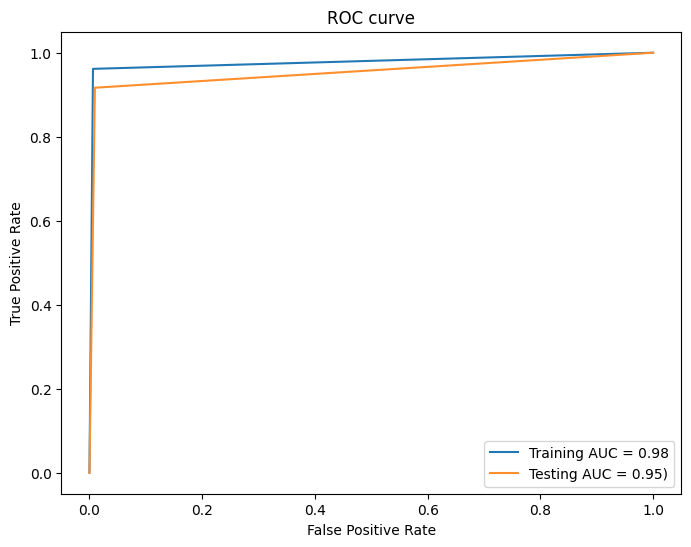

In [27]:
import xgboost as xgb
clf=xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8,
                        subsample=0.8, nthread=10, learning_rate=0.1)

clf.fit(x_train_tfidf.toarray(),list(y_train))
y_train_pred = clf.predict(x_train_tfidf.toarray())
y_pred = clf.predict(x_test_tfidf.toarray())
calculate_metrics(y_train_pred, y_pred)

# Model Evaluation

|  | Accuracy | Precision | Recall | Specificity | F1 | AUC |
|----------|----------|----------|----------|----------|----------|----------|
| Logistic regression | 0.95059 | 0.97683 | 0.91666 | 0.980707 | 0.94579 | 0.948687   |
| Naive Bayes    | 0.74957 | 0.79723 | 0.62681 | 0.8585 | 0.70182 | 0.742666|
| kNN    | 0.81431 | 0.94652 | 0.6413 | 0.9678 | 0.76457 | 0.804575   |
| Random forest    | 0.96422 | 0.98479 | 0.9384 | 0.983922 | 0.96103 | 0.96277    |
| MLP    | 0.918228 | 0.93181 | 0.8913 | 0.9389 | 0.9111 | 0.91671  |
| SVC   | 0.94718 | 0.9622 | 0.92391 | 0.96784 | 0.94269 | 0.94587   |
| Voting    | 0.92844 | 0.99159 | 0.85507 | 0.99035 | 0.918287 | 0.92432   |
| XGB    | 0.9557 | 0.9882 | 0.91666 | 0.99035 | 0.95112 | 0.95351 |




# Conclusion

**Optimal model:** Random forest \\
**Best n_estimators:** 180 \\
**Best max_depth:** None